In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

import pickle
file = open('wdbc.pkl','rb')
data = pickle.load(file)
data['prediction']=0
data.head()

,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,prediction
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [363]:
data['prediction']=0 # initialize with bebign

for i in range(len(data)):
    if data.loc[i,'area_2'] > 886:
        data.loc[i,'prediction']=1
    if data.loc[i,'concave points_2'] > 0.146:
        data.loc[i,'prediction']=1
    if data.loc[i,'texture_2'] > 34.5:
        data.loc[i,'prediction']=1 
#     if data.loc[i,'perimeter_2'] > 127.58:
#         data.loc[i,'prediction']=1
#     if data.loc[i,'concavity_0'] > 0.181:
#         data.loc[i,'prediction']=1
#     if data.loc[i,'compactness_0'] > 0.148:
#         data.loc[i,'prediction']=1
#     if data.loc[i,'smoothness_2'] > 0.185:
#         data.loc[i,'prediction']=1
#     if data.loc[i,'symmetry_2'] >  0.395:
#         data.loc[i,'prediction']=1    
cm = confusion_matrix(data['malignant'].values,data['prediction'].values)
se = cm[1,1]/(cm[1,1]+cm[1,0])
sp = cm[0,0]/(cm[0,0]+cm[0,1])
print('sensitivity',se,'specificity',sp)

sensitivity 0.9481132075471698 specificity 0.907563025210084


In [236]:
# Select the threshold for each feature
def confusion(feature,data,k):
    data_positive = data[data['malignant']==1]
    data_negative = data[data['malignant']==0]
    data['prediction']=0
    threshold = data_negative_describe.loc['mean',feature]+data_negative_describe.loc['std',feature]*k
    for i in range(len(data)):
        if data.loc[i,feature] > threshold:
            data.loc[i,'prediction']=1
   # return (confusion_matrix(data['malignant'].values,data['prediction'].values),threshold)
    cm = confusion_matrix(data['malignant'].values,data['prediction'].values)
    se = cm[1,1]/(cm[1,1]+cm[1,0])
    sp = cm[0,0]/(cm[0,0]+cm[0,1])
    return (cm,se,sp,threshold)

In [357]:
cm = confusion('texture_0',data,2)
cm

(array([[339,  18],
        [188,  24]], dtype=int64),
 0.9495798319327731,
 0.11320754716981132,
 25.905011092113714)

In [318]:
cm = confusion('area_2',data,2)
cm

(array([[349,   8],
        [ 37, 175]], dtype=int64),
 0.9775910364145658,
 0.8254716981132075,
 886.1022875542369)

In [317]:
cm = confusion('concave points_2',data,2)
cm

(array([[348,   9],
        [ 40, 172]], dtype=int64),
 0.9747899159663865,
 0.8113207547169812,
 0.14603909208907295)

In [351]:
cm = confusion('perimeter_2',data,3)
cm

(array([[357,   0],
        [ 77, 135]], dtype=int64),
 1.0,
 0.6367924528301887,
 127.58721107704498)

In [294]:
cm = confusion('concavity_0',data,1)
cm

(array([[319,  38],
        [ 28, 184]], dtype=int64),
 0.8935574229691877,
 0.8679245283018868,
 0.08949977205346496)

In [338]:
cm = confusion('compactness_0',data,3)
cm

(array([[352,   5],
        [166,  46]], dtype=int64),
 0.9859943977591037,
 0.2169811320754717,
 0.18133448562816723)

In [330]:
cm = confusion('smoothness_2',data,3)
cm

(array([[354,   3],
        [201,  11]], dtype=int64),
 0.9915966386554622,
 0.05188679245283019,
 0.1849998914223853)

In [349]:
cm = confusion('symmetry_2',data,3)
cm

(array([[355,   2],
        [179,  33]], dtype=int64),
 0.9943977591036415,
 0.15566037735849056,
 0.3954802376614676)

In [322]:
cm = confusion('texture_2',data,2)
cm

(array([[341,  16],
        [183,  29]], dtype=int64),
 0.9551820728291317,
 0.13679245283018868,
 34.50297907409674)

In [ ]:
# size: area_2; 
# shape: concave points_2, perimeter_2, concavity_0, compactness_0, smoothness_2, symmetry_2
# texture: texture_2

features_selected = ['concave points_2','perimeter_2','area_2','concavity_2','compactness_0','texture_2','smoothness_2','symmetry_2']
# concave points_0, radius_2, concavity_0, 

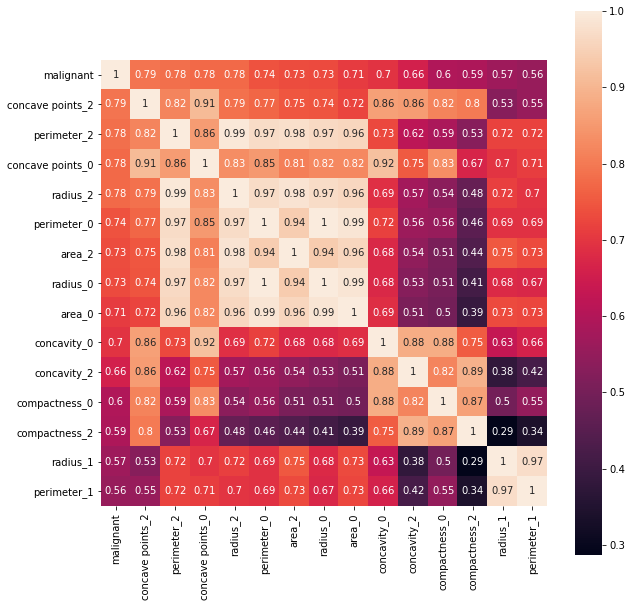

In [38]:
# Find the features with the highest corelation with label
cols = ['malignant','radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0', 'radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2']

corr_mat = data[cols].corr()
k = 15
#corr_mat
cols_selected = corr_mat.nlargest(k,'malignant')['malignant'].index
cm = np.corrcoef(data[cols_selected].values.T)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, square=True, yticklabels=cols_selected.values, xticklabels=cols_selected.values)
plt.show()

In [43]:
#corr_mat.nlargest(30, 'malignant')['malignant']

In [42]:
#corr_mat.nlargest(30, 'smoothness_2')['smoothness_2']